In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('seaborn')
sns.set(font_scale=2.5)
%matplotlib inline
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import plot_model

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2)

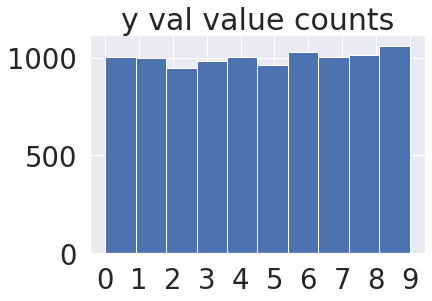

In [5]:
plt.hist(y_val)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.title("y val value counts")
plt.show()

In [6]:
x_train.shape

(40000, 32, 32, 3)

In [7]:
y_train.shape

(40000, 1)

In [8]:
lst = []
for i,im in enumerate(y_train):
  if im==1:
    lst.append(i)
print(lst)
lst = np.array(lst)

[0, 4, 5, 9, 20, 29, 31, 38, 39, 54, 60, 61, 62, 74, 77, 81, 84, 91, 123, 124, 128, 133, 134, 154, 157, 159, 163, 168, 186, 193, 204, 218, 222, 226, 229, 230, 237, 251, 252, 270, 273, 288, 304, 331, 357, 388, 390, 407, 433, 443, 444, 446, 471, 472, 488, 494, 509, 523, 527, 531, 557, 562, 564, 616, 628, 629, 640, 647, 651, 654, 695, 739, 740, 759, 767, 768, 770, 774, 779, 800, 809, 811, 813, 814, 823, 824, 872, 905, 908, 917, 926, 931, 954, 955, 960, 968, 1008, 1012, 1018, 1035, 1049, 1068, 1077, 1094, 1104, 1122, 1149, 1156, 1167, 1171, 1187, 1194, 1195, 1200, 1212, 1215, 1228, 1257, 1258, 1261, 1263, 1282, 1293, 1295, 1301, 1303, 1323, 1326, 1333, 1348, 1361, 1371, 1373, 1401, 1404, 1413, 1419, 1427, 1447, 1448, 1458, 1459, 1470, 1483, 1484, 1486, 1493, 1511, 1516, 1552, 1554, 1573, 1575, 1576, 1579, 1586, 1587, 1598, 1603, 1639, 1662, 1667, 1677, 1688, 1699, 1702, 1711, 1727, 1731, 1739, 1741, 1762, 1765, 1771, 1780, 1795, 1816, 1835, 1847, 1868, 1869, 1871, 1878, 1881, 1895, 1916, 1

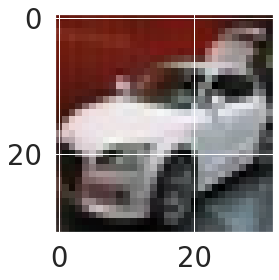

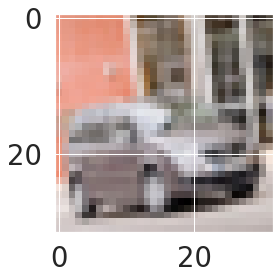

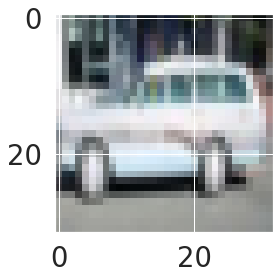

In [9]:
for i in range(3):
  plt.imshow(x_train[lst[i]])
  plt.show()

In [10]:
train_datagen = ImageDataGenerator(
  rescale = 1./255.,
  width_shift_range= 0.2,
  zoom_range = 0.3,
  horizontal_flip = True
)
val_datagen = ImageDataGenerator(
  rescale = 1./255.
)
test_datagen = ImageDataGenerator(
  rescale = 1./255.
)

In [11]:
train_generator = train_datagen.flow(
    x_train,y_train
)
validation_generator = val_datagen.flow(
    x_val,y_val
)
test_genrator = test_datagen.flow(
    x_test,y_test
)

In [12]:
model = VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))
model.trainable = False
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [13]:
top_model = keras.Sequential()
top_model.add(model)
top_model.add(layers.Flatten())
top_model.add(layers.Dense(256, activation='relu'))
top_model.add(layers.Dense(10, activation='softmax'))

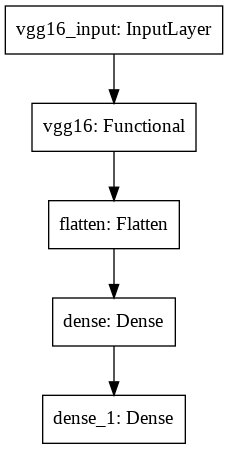

In [14]:
plot_model(top_model)

In [15]:
top_model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [16]:
history_Vgg = top_model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=500,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
39/39 [==============================] - 32s 53ms/step - loss: 2.3014 - sparse_categorical_accuracy: 0.1416 - val_loss: 1.8851 - val_sparse_categorical_accuracy: 0.3646
Epoch 2/500
39/39 [==============================] - 1s 35ms/step - loss: 1.9311 - sparse_categorical_accuracy: 0.3305 - val_loss: 1.7598 - val_sparse_categorical_accuracy: 0.3750
Epoch 3/500
39/39 [==============================] - 1s 35ms/step - loss: 1.7507 - sparse_categorical_accuracy: 0.3869 - val_loss: 1.6898 - val_sparse_categorical_accuracy: 0.4062
Epoch 4/500
39/39 [==============================] - 1s 36ms/step - loss: 1.6899 - sparse_categorical_accuracy: 0.4511 - val_loss: 1.5951 - val_sparse_categorical_accuracy: 0.4688
Epoch 5/500
39/39 [==============================] - 1s 35ms/step - loss: 1.6413 - sparse_categorical_accuracy: 0.4146 - val_loss: 1.5813 - val_sparse_categorical_accuracy: 0.4410
Epoch 6/500
39/39 [==============================] - 1s 35ms/step - loss: 1.5911 - sparse_categoric

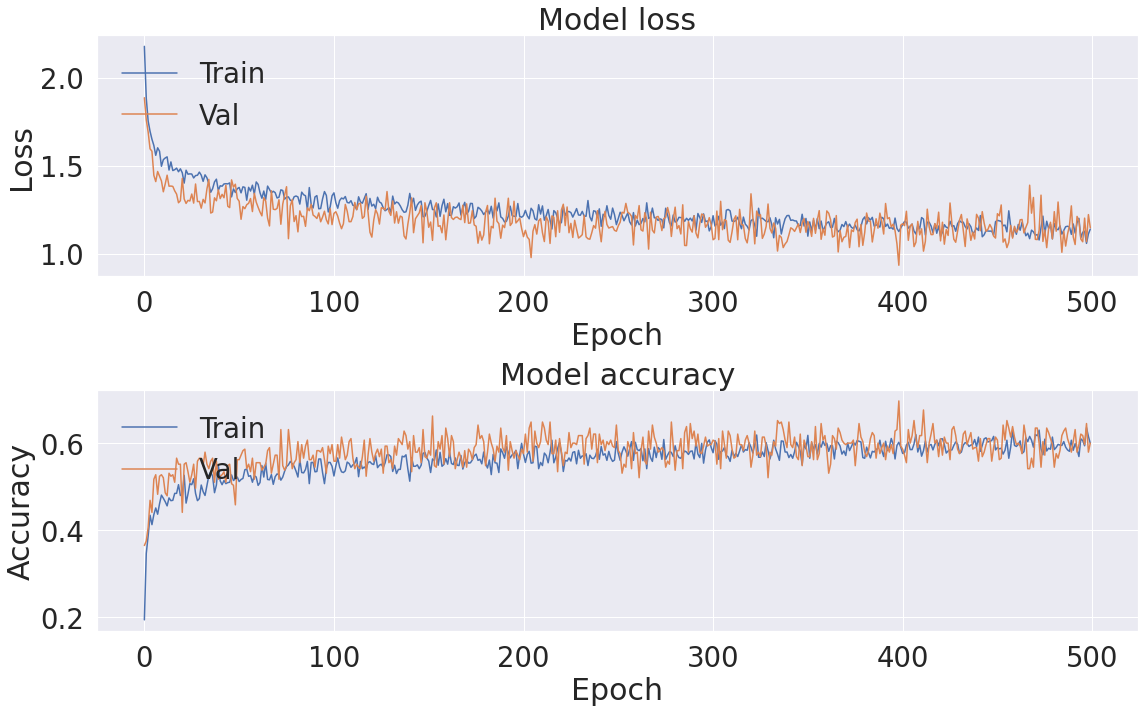

In [17]:
f,ax = plt.subplots(2,1,figsize=(16,10))
ax[0].plot(history_Vgg.history['loss'])
ax[0].plot(history_Vgg.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

ax[1].plot(history_Vgg.history['sparse_categorical_accuracy'])
ax[1].plot(history_Vgg.history['val_sparse_categorical_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

f.tight_layout()
plt.show()

In [18]:
top_model.evaluate(test_genrator,batch_size=32)

313/313 [==============================] - 6s 20ms/step - loss: 1.1442 - sparse_categorical_accuracy: 0.6006


[1.1441786289215088, 0.600600004196167]

In [19]:
for layer in model.layers[-8:]:
  layer.trainable = True

In [20]:
top_model.compile(optimizer = tf.keras.optimizers.Adam(lr=1e-5),
                loss = 'sparse_categorical_crossentropy',
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [21]:
history_Vgg = top_model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=500,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
39/39 [==============================] - 2s 45ms/step - loss: 1.1563 - sparse_categorical_accuracy: 0.5886 - val_loss: 1.1582 - val_sparse_categorical_accuracy: 0.5868
Epoch 2/500
39/39 [==============================] - 1s 36ms/step - loss: 1.1208 - sparse_categorical_accuracy: 0.6337 - val_loss: 1.2372 - val_sparse_categorical_accuracy: 0.5868
Epoch 3/500
39/39 [==============================] - 1s 36ms/step - loss: 1.1092 - sparse_categorical_accuracy: 0.6206 - val_loss: 0.9978 - val_sparse_categorical_accuracy: 0.6181
Epoch 4/500
39/39 [==============================] - 1s 35ms/step - loss: 1.1442 - sparse_categorical_accuracy: 0.5823 - val_loss: 1.0578 - val_sparse_categorical_accuracy: 0.6285
Epoch 5/500
39/39 [==============================] - 1s 35ms/step - loss: 1.1052 - sparse_categorical_accuracy: 0.6161 - val_loss: 1.2464 - val_sparse_categorical_accuracy: 0.5521
Epoch 6/500
39/39 [==============================] - 1s 36ms/step - loss: 1.1497 - sparse_categorica

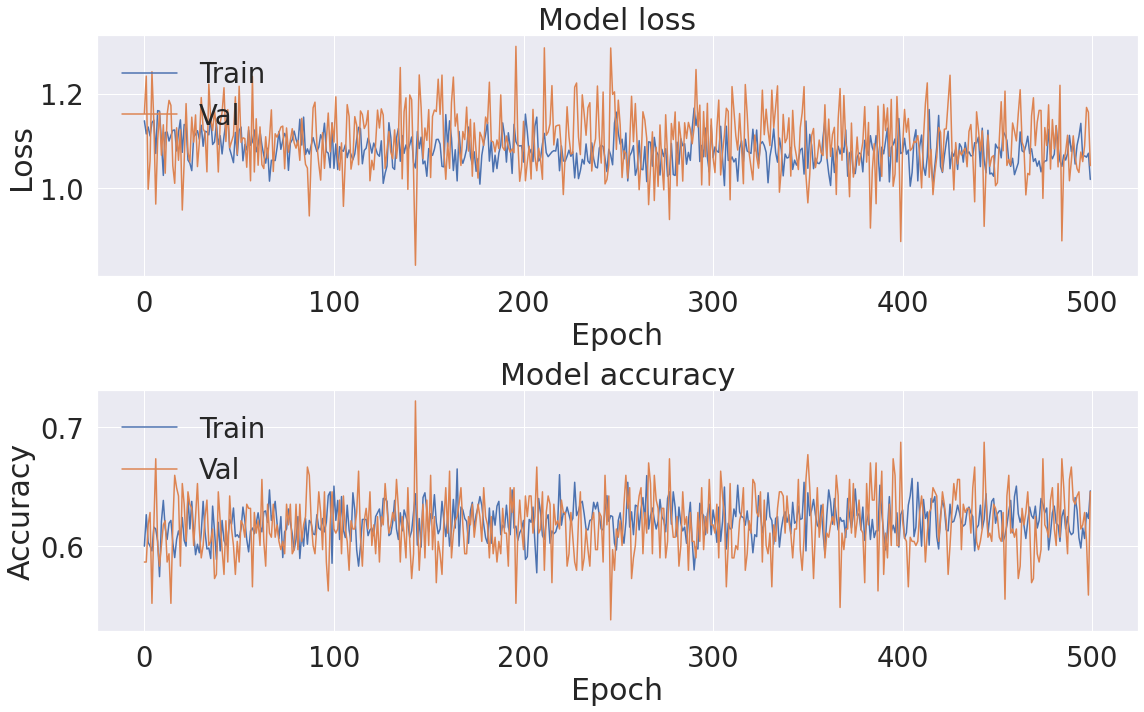

In [23]:
f,ax = plt.subplots(2,1,figsize=(16,10))
ax[0].plot(history_Vgg.history['loss'])
ax[0].plot(history_Vgg.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

ax[1].plot(history_Vgg.history['sparse_categorical_accuracy'])
ax[1].plot(history_Vgg.history['val_sparse_categorical_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

f.tight_layout()
plt.show()

In [ ]:
#Part A

In [24]:
#modeling

inputs = layers.Input(shape=(32,32,3))

net = layers.Conv2D(32,5,1,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Conv2D(64,3,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Conv2D(128,3,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Flatten()(net)
net = layers.Dense(500)(net)
net = layers.Dropout(0.5)(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model_A = tf.keras.Model(inputs = inputs, outputs = net, name = 'CNN')

In [25]:
model_A.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0       

In [26]:
model_A.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [27]:
history_A = model_A.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=500,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
39/39 [==============================] - 2s 34ms/step - loss: 2.4743 - sparse_categorical_accuracy: 0.1257 - val_loss: 2.2222 - val_sparse_categorical_accuracy: 0.1597
Epoch 2/500
39/39 [==============================] - 1s 30ms/step - loss: 2.1805 - sparse_categorical_accuracy: 0.2203 - val_loss: 2.0161 - val_sparse_categorical_accuracy: 0.3021
Epoch 3/500
39/39 [==============================] - 1s 30ms/step - loss: 1.9744 - sparse_categorical_accuracy: 0.2767 - val_loss: 1.9953 - val_sparse_categorical_accuracy: 0.2917
Epoch 4/500
39/39 [==============================] - 1s 29ms/step - loss: 1.9109 - sparse_categorical_accuracy: 0.3134 - val_loss: 1.7526 - val_sparse_categorical_accuracy: 0.3542
Epoch 5/500
39/39 [==============================] - 1s 29ms/step - loss: 1.8681 - sparse_categorical_accuracy: 0.3173 - val_loss: 1.7727 - val_sparse_categorical_accuracy: 0.3229
Epoch 6/500
39/39 [==============================] - 1s 29ms/step - loss: 1.8562 - sparse_categorica

In [28]:
model_A.evaluate(test_genrator,batch_size=64)


313/313 [==============================] - 2s 5ms/step - loss: 0.8279 - sparse_categorical_accuracy: 0.7174


[0.8279056549072266, 0.7174000144004822]

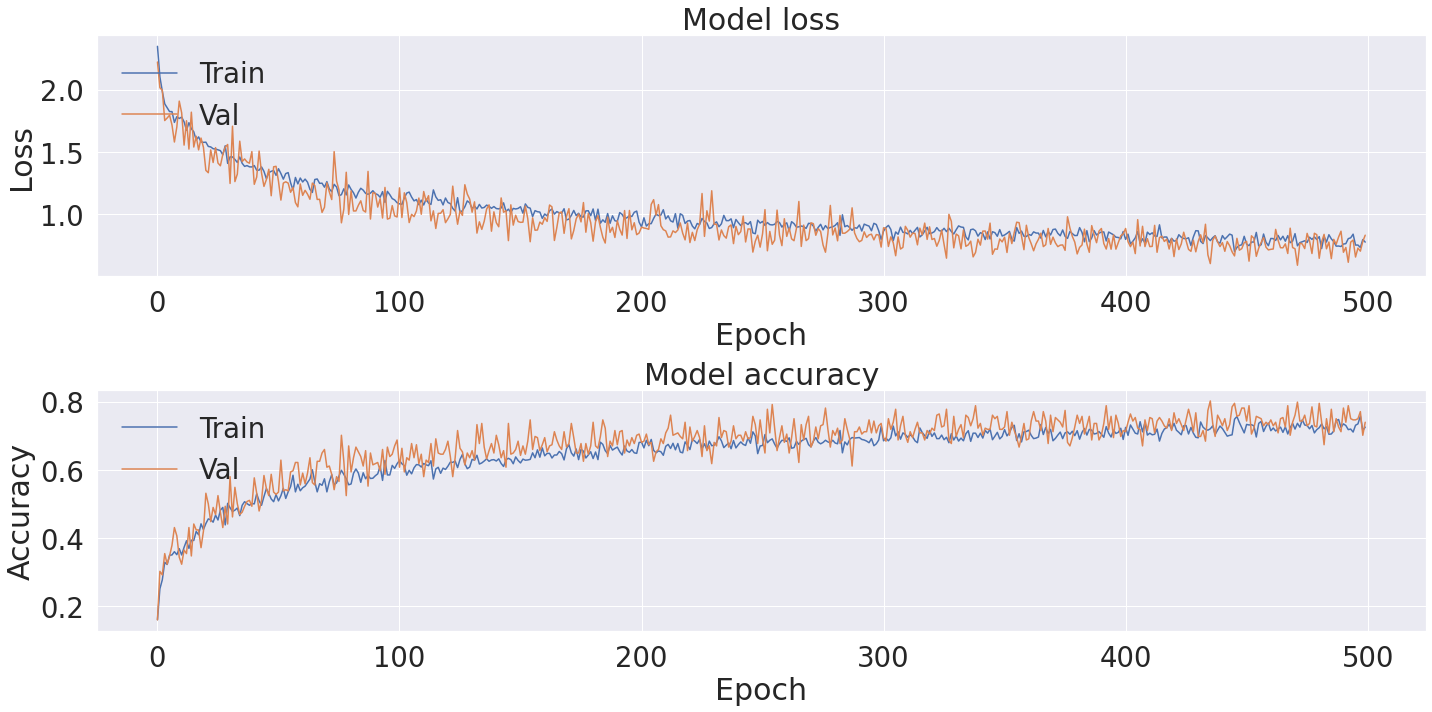

In [31]:
f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(history_A.history['loss'])
ax[0].plot(history_A.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

ax[1].plot(history_A.history['sparse_categorical_accuracy'])
ax[1].plot(history_A.history['val_sparse_categorical_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

f.tight_layout()
plt.show()

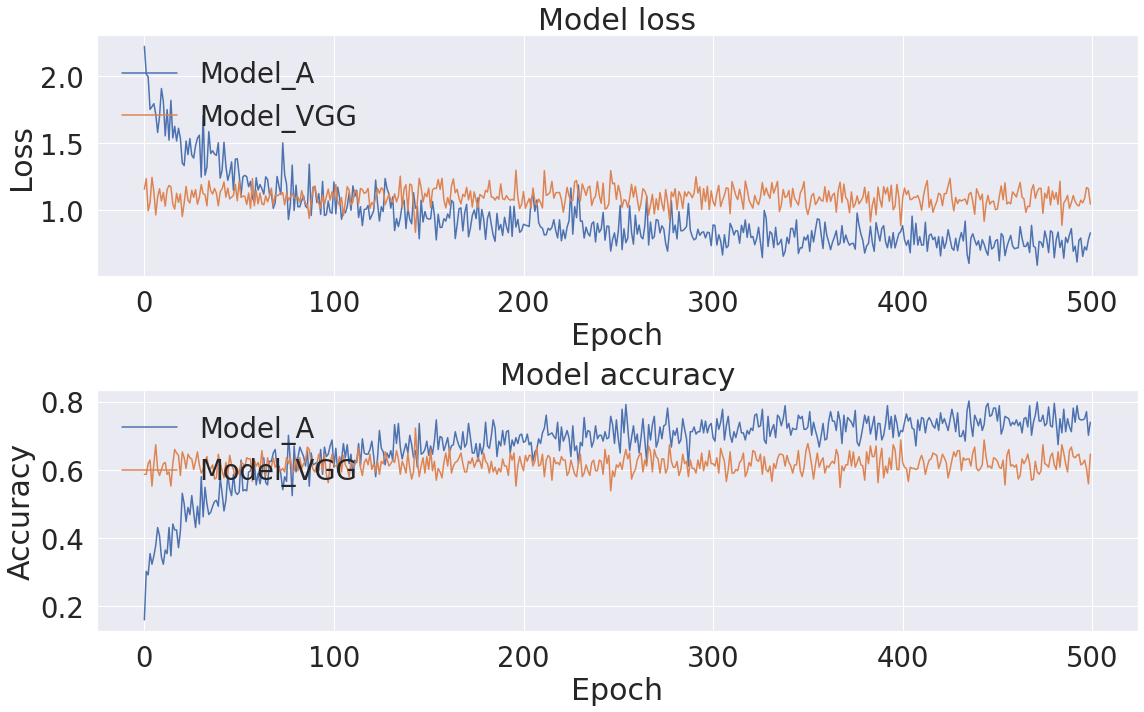

In [32]:
f,ax = plt.subplots(2,1,figsize=(16,10))
ax[0].plot(history_A.history['val_loss'])
ax[0].plot(history_Vgg.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Model_A', 'Model_VGG'], loc='upper left')

ax[1].plot(history_A.history['val_sparse_categorical_accuracy'])
ax[1].plot(history_Vgg.history['val_sparse_categorical_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Model_A', 'Model_VGG'], loc='upper left')

f.tight_layout()
plt.show()